In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [16]:
# Average price by brand and vehicle
a = df.groupby(['brand','vehicleType'], as_index=False)['price'].mean()
a.rename(columns={'price':'avgPrice'}, inplace=True)
a.avgPrice = np.ceil(a.avgPrice).astype(int)
a = a[['avgPrice', 'brand','vehicleType']]
a.head()

,avgPrice,brand,vehicleType
0,670,alfa_romeo,Other
1,963,alfa_romeo,andere
2,7036,alfa_romeo,cabrio
3,5266,alfa_romeo,coupe
4,1868,alfa_romeo,kleinwagen


## Vehicle distribution based on year of registration

AttributeError: 'Rectangle' object has no property 'normed'

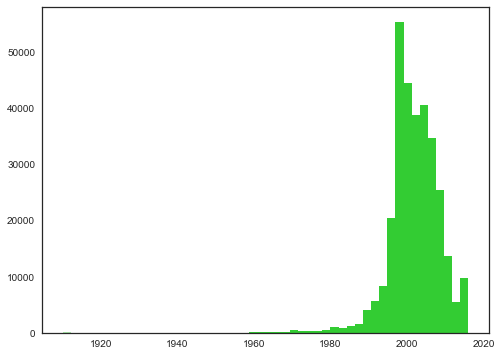

In [9]:
# Vehicle distribution based on year of registration plot

fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df['yearOfRegistration'], kde = True, color = "yellowgreen", ax = ax)
ax.set_title('Vehicle distribution based on year of registration', fontsize= 20, fontweight="bold")
plt.ylabel("Density (KDE)", fontsize= 15)
plt.xlabel("Registration Year", fontsize= 15)
plt.show()

## Variation of price range by vehicle type

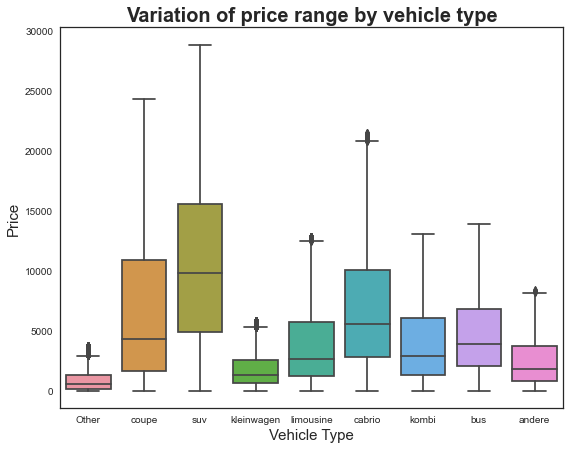

In [10]:
# Boxplot to evaluate the outliers

fig, ax = plt.subplots(figsize=(9,7))
sns.boxplot(df.vehicleType, df.price, ax = ax)
ax.set_title('Variation of price range by vehicle type', fontsize= 20, fontweight="bold")
plt.ylabel("Price", fontsize= 15)
plt.xlabel("Vehicle Type", fontsize= 15)
plt.show()

## Total count of vehicles for sale according to type of vehicle

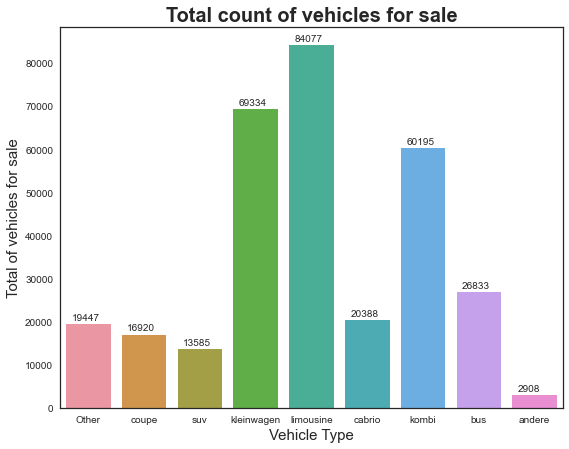

In [11]:
# Count Plot to show the vehicle number belongs to each category

fig, ax = plt.subplots(figsize=(9,7))
sns.countplot(x = df.vehicleType, ax = ax)
ax.set_title('Total count of vehicles for sale', fontsize= 20, fontweight="bold")
plt.ylabel("Total of vehicles for sale", fontsize= 15)
plt.xlabel("Vehicle Type", fontsize= 15)
for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1000))

## Number of vehicles belonging to each make

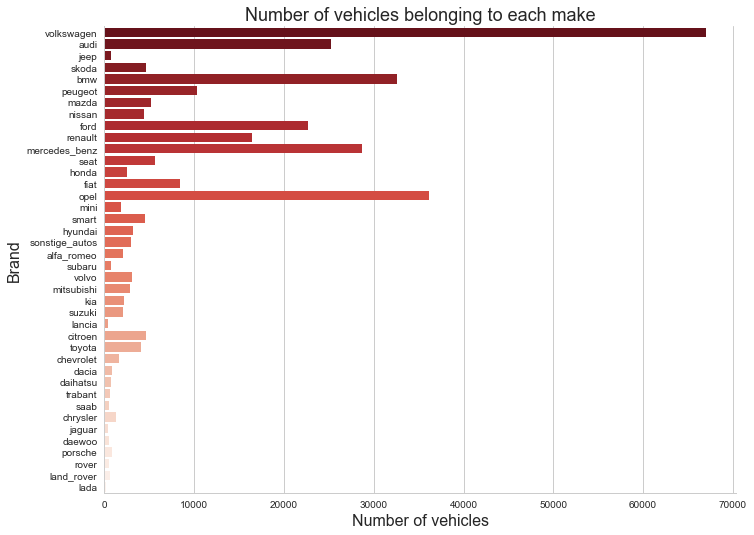

In [12]:
# Crie um Plot que mostre o número de veículos pertencentes a cada marca
sns.set_style("whitegrid")
g = sns.factorplot(y="brand", data=df, kind="count", palette="Reds_r", size=7, aspect=1.5)
g.ax.set_title("Number of vehicles belonging to each make",fontdict={'size':18})
g.ax.xaxis.set_label_text("Number of vehicles",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Brand",fontdict= {'size':16})
plt.show()

## Average vehicle price based on vehicle type as well as gearbox type

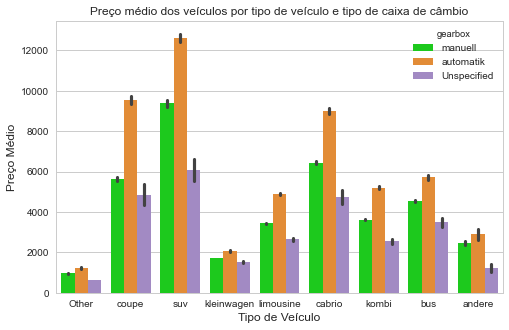

In [13]:
# Average vehicle price based on vehicle type as well as gearbox type plot
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=df)
ax.set_title("Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
plt.show()

## Average vehicle price by fuel type and gearbox type

Text(0.5, 0, 'Vehicle type')

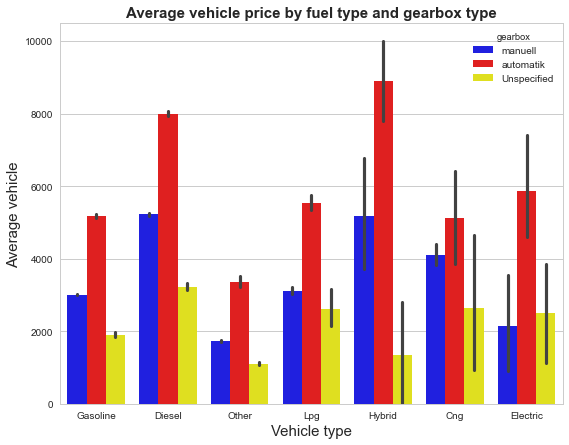

In [14]:
# Crie um Barplot com o Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

fig, ax = plt.subplots(figsize=(9,7))
colors = ["Blue", "Red", "Yellow"]
sns.barplot(x = "fuelType", y = "price", hue = "gearbox", data = df, palette = colors)
ax.set_title('Average vehicle price by fuel type and gearbox type', fontsize= 15, fontweight="bold")
plt.ylabel("Average vehicle", fontsize= 15)
plt.xlabel("Vehicle type", fontsize= 15)

## Average power of a vehicle per vehicle type and gearbox type

Text(0.5, 0, 'Vehicle type')

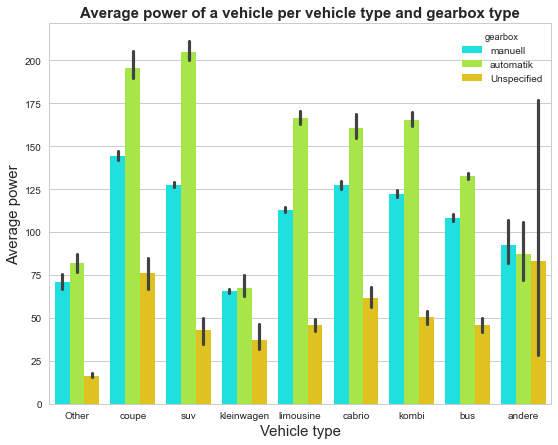

In [15]:
# Crie um Barplot com a Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

fig, ax = plt.subplots(figsize=(9,7))
colors = ["cyan", "greenyellow", "gold"]
sns.barplot(x = "vehicleType", y = "powerPS", hue = "gearbox", data = df, palette = colors)
ax.set_title('Average power of a vehicle per vehicle type and gearbox type', fontsize= 15, fontweight="bold")
plt.ylabel("Average power", fontsize= 15)
plt.xlabel("Vehicle type", fontsize= 15)

## Average price of a vehicle per make as well as type of vehicle

Text(0.5, 115.0, 'Vehicle type')

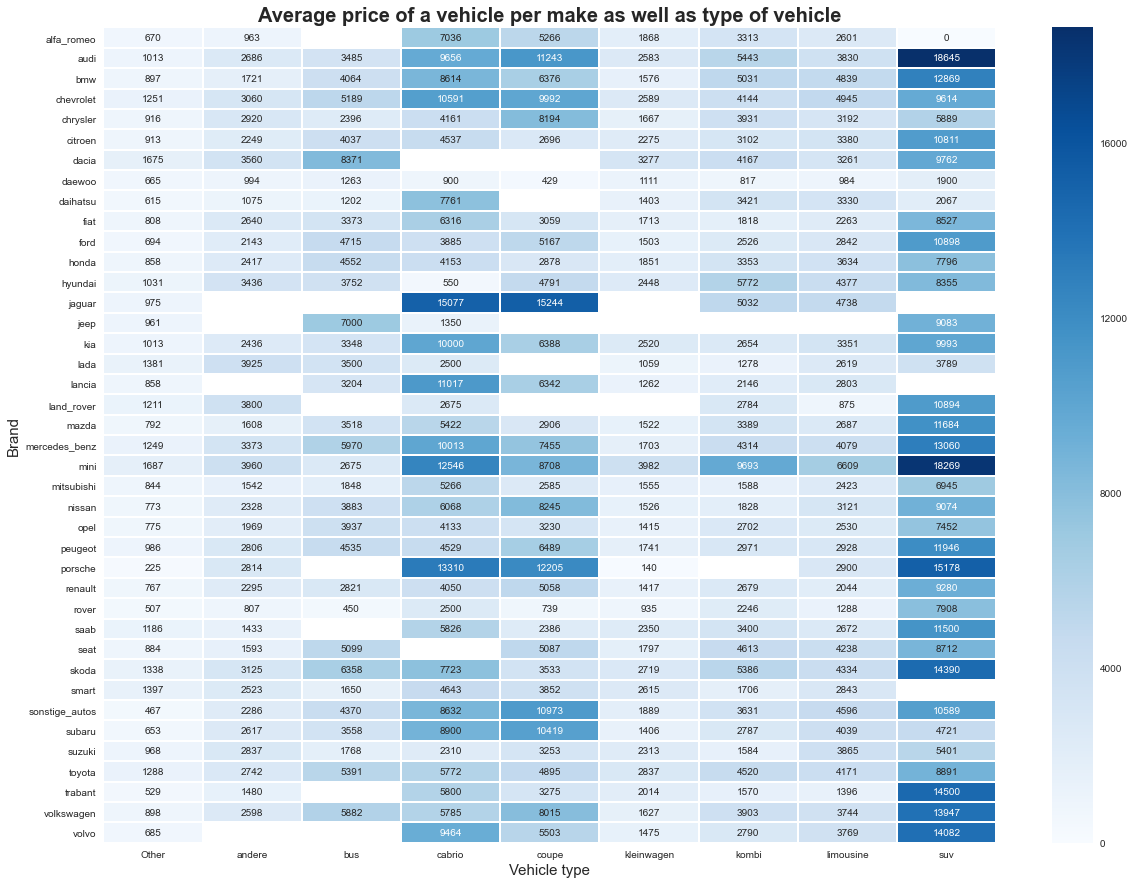

In [17]:
# Average price of a vehicle per make as well as type of vehicle Heatmap
b = a.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(20,15))
#colors = ["cyan", "greenyellow", "gold"]
sns.heatmap(b,linewidths=1,cmap="Blues",annot=True, fmt = '.0f', ax=ax)
ax.set_title('Average price of a vehicle per make as well as type of vehicle', fontsize= 20, fontweight="bold")
plt.ylabel("Brand", fontsize= 15)
plt.xlabel("Vehicle type", fontsize= 15)